<a href="https://colab.research.google.com/github/YuvrajGaykhe/DataSet-Analysis/blob/main/Dataset_Analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Daily_Water_Intake.csv")

print("Dataset Shape:", df.shape)

print("\nDataset Info:")
print(df.info())

Dataset Shape: (30000, 7)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          30000 non-null  int64  
 1   Gender                       30000 non-null  object 
 2   Weight (kg)                  30000 non-null  int64  
 3   Daily Water Intake (liters)  30000 non-null  float64
 4   Physical Activity Level      30000 non-null  object 
 5   Weather                      30000 non-null  object 
 6   Hydration Level              30000 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.6+ MB
None


In [ ]:
print("\nDescriptive Statistics (Numerical):")
print(df.describe())


Descriptive Statistics (Numerical):
                Age  Weight (kg)  Daily Water Intake (liters)
count  30000.000000  30000.00000                 30000.000000
mean      43.467667     76.84860                     2.852444
std       14.998940     18.74494                     0.835537
min       18.000000     45.00000                     1.500000
25%       30.000000     61.00000                     2.220000
50%       43.000000     77.00000                     2.830000
75%       56.000000     93.00000                     3.440000
max       69.000000    109.00000                     5.430000


In [ ]:
print("\nDescriptive Statistics (Including Categorical):")
print(df.describe(include="all"))


Descriptive Statistics (Including Categorical):
                 Age Gender  Weight (kg)  Daily Water Intake (liters)  \
count   30000.000000  30000  30000.00000                 30000.000000   
unique           NaN      2          NaN                          NaN   
top              NaN   Male          NaN                          NaN   
freq             NaN  15032          NaN                          NaN   
mean       43.467667    NaN     76.84860                     2.852444   
std        14.998940    NaN     18.74494                     0.835537   
min        18.000000    NaN     45.00000                     1.500000   
25%        30.000000    NaN     61.00000                     2.220000   
50%        43.000000    NaN     77.00000                     2.830000   
75%        56.000000    NaN     93.00000                     3.440000   
max        69.000000    NaN    109.00000                     5.430000   

       Physical Activity Level Weather Hydration Level  
count            

In [ ]:
print("\nMissing Values Per Column:")
print(df.isnull().sum())


Missing Values Per Column:
Age                            0
Gender                         0
Weight (kg)                    0
Daily Water Intake (liters)    0
Physical Activity Level        0
Weather                        0
Hydration Level                0
dtype: int64


In [ ]:
print("\nNumber of Duplicate Rows:", df.duplicated().sum())


Number of Duplicate Rows: 338


In [ ]:
stats = df.describe().T
stats["variance"] = df.var(numeric_only=True)
stats["range"] = df.max(numeric_only=True) - df.min(numeric_only=True)

print("\nExtended Statistical Summary:")
print(stats)


Extended Statistical Summary:
                               count       mean        std   min    25%  \
Age                          30000.0  43.467667  14.998940  18.0  30.00   
Weight (kg)                  30000.0  76.848600  18.744940  45.0  61.00   
Daily Water Intake (liters)  30000.0   2.852444   0.835537   1.5   2.22   

                               50%    75%     max    variance  range  
Age                          43.00  56.00   69.00  224.968187  51.00  
Weight (kg)                  77.00  93.00  109.00  351.372790  64.00  
Daily Water Intake (liters)   2.83   3.44    5.43    0.698122   3.93  


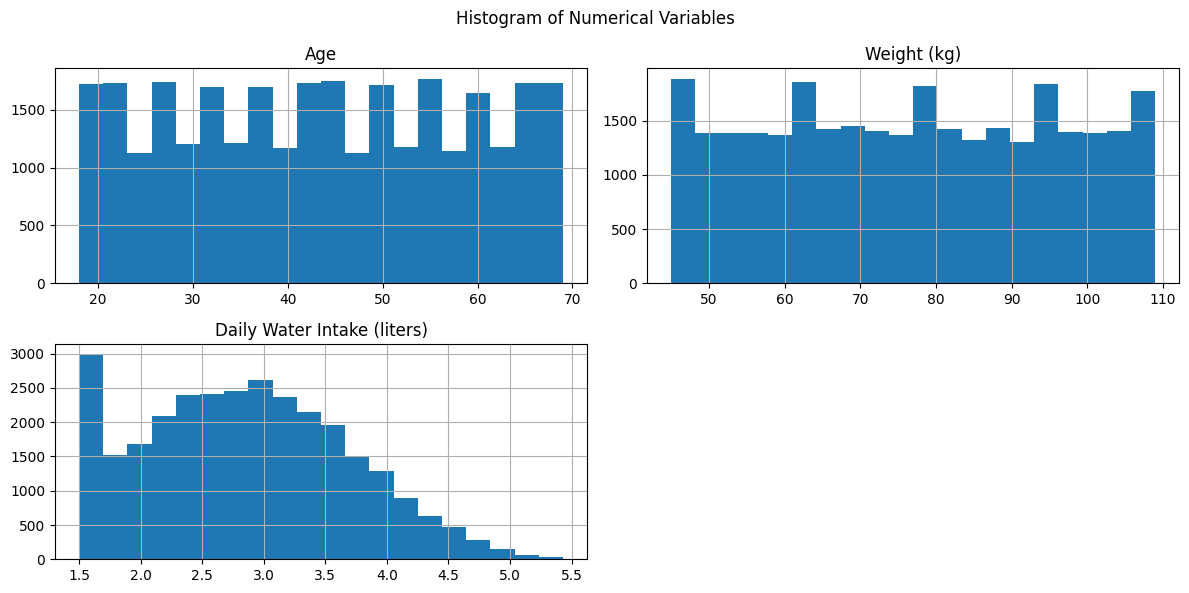

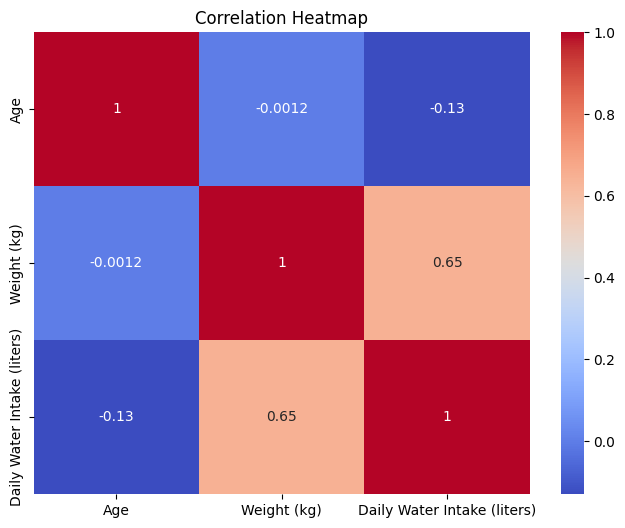

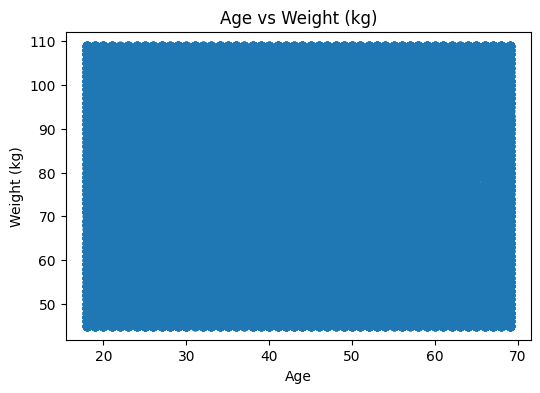

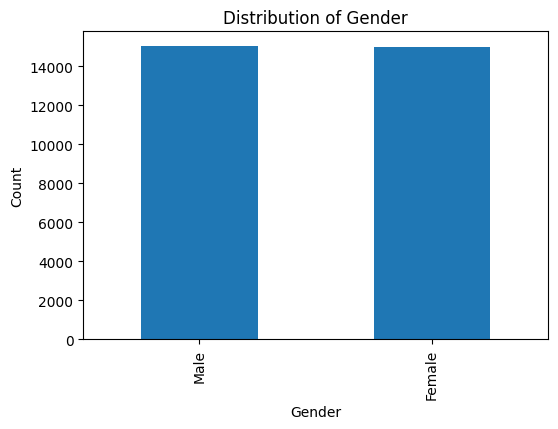

In [ ]:
df.select_dtypes(include="number").hist(bins=20, figsize=(12, 6))
plt.suptitle("Histogram of Numerical Variables")
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
num_cols = df.select_dtypes(include="number").columns

if len(num_cols) >= 2:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[num_cols[0]], df[num_cols[1]])
    plt.xlabel(num_cols[0])
    plt.ylabel(num_cols[1])
    plt.title(f"{num_cols[0]} vs {num_cols[1]}")
    plt.show()


cat_cols = df.select_dtypes(include="object").columns

if len(cat_cols) > 0:
    plt.figure(figsize=(6, 4))
    df[cat_cols[0]].value_counts().plot(kind="bar")
    plt.xlabel(cat_cols[0])
    plt.ylabel("Count")
    plt.title(f"Distribution of {cat_cols[0]}")
    plt.show()
